## Image classification on CIFAR-10 Dataset using CNN, RNN and logistic regression   
### <div style="text-align: right"> Kliment Berbatov, FN:81946 </div>

importing used libraries and methods

In [2]:
from torch.nn import Sequential
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch
import random
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import PIL

Using gpu for faster operations

In [104]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


## Data loading

* Data is previously divided in 2 batches for training and testing.  
* Training batch contains 50000 tensors of shape (32,32,3) representing an image and 1 number between 0 and 9, representing the label. There is 5000 images for each label.
* Similarly the test batch contains 10000 tensors of shape (32,32,3) for the images and corresponding labels. There are 1000 images for each class.

Here are some sample images from the dataset  
![CIFAR-10](./CIFAR-10.png)

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# batch_size = 4
batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size,
    shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size*2,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Representation of images in the dataset 

In [126]:
ind = random.choice(range(trainset.data.shape[0]))
image = trainset[ind]
print(image[0])
print(classes[image[1]])

tensor([[[-0.6157, -0.3176,  0.0039,  ...,  0.4745,  0.6235, -0.2314],
         [-0.4118, -0.0745,  0.1137,  ...,  0.8196,  0.0588, -0.4745],
         [-0.2471,  0.0431,  0.1843,  ...,  0.4588, -0.3255, -0.5216],
         ...,
         [ 0.1216,  0.1216,  0.1294,  ..., -0.5608, -0.6235, -0.7804],
         [ 0.1137,  0.1137,  0.1137,  ..., -0.5608, -0.5216, -0.6784],
         [ 0.1059,  0.1216,  0.1373,  ..., -0.6314, -0.6627, -0.6784]],

        [[-0.7569, -0.3725, -0.0353,  ...,  0.4353,  0.5686, -0.3333],
         [-0.5216, -0.1216,  0.0667,  ...,  0.7725, -0.0118, -0.5686],
         [-0.3255,  0.0039,  0.1294,  ...,  0.3725, -0.4118, -0.6078],
         ...,
         [ 0.0588,  0.0431,  0.0275,  ..., -0.6314, -0.6706, -0.8118],
         [ 0.0510,  0.0275,  0.0118,  ..., -0.6627, -0.6157, -0.7490],
         [ 0.0431,  0.0353,  0.0275,  ..., -0.7490, -0.7647, -0.7569]],

        [[-0.7569, -0.3569,  0.0118,  ...,  0.3647,  0.5059, -0.3961],
         [-0.5373, -0.1059,  0.1137,  ...,  0

A random sample of images in the training set

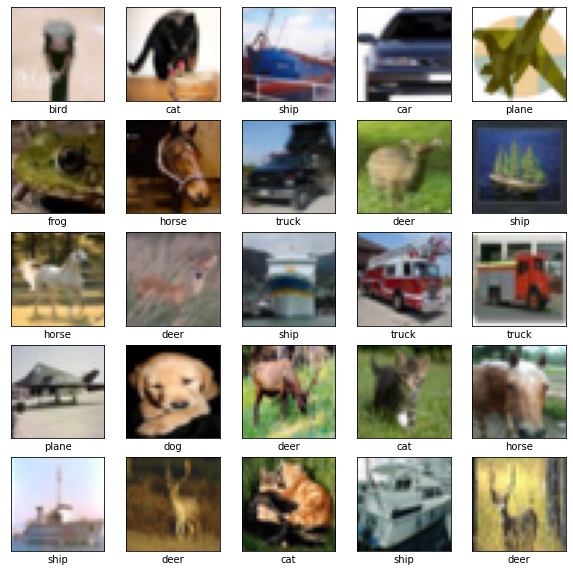

In [127]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ind = random.choice(range(trainset.data.shape[0]))
    plt.imshow(trainset.data[ind])
    plt.xlabel(classes[trainset[ind][1]])
plt.show()

And the test set

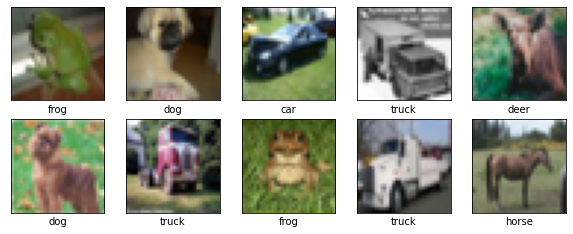

In [128]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ind = random.choice(range(testset.data.shape[0]))
    plt.imshow(testset.data[ind])
    plt.xlabel(classes[testset[ind][1]])
plt.show()

## Logistic Regression

### Data processing

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LR_train_x, LR_train_y = trainset.data.reshape(50000,-1), trainset.targets
LR_test_x, LR_test_y = testset.data.reshape(10000,-1),testset.targets
# LR_train_x,LR_val_x,LR_train_y,LR_val_y = train_test_split(LR_train_x,LR_train_y,test_size=0.2,random_state=42)

In [115]:
LR_train_x.shape

(50000, 3072)

### Straightforward logistic regression without any modification

Using the ``saga`` solver because it is better suited for datasets with more features. Here every pixel value is actually 3 features, because of the three color channels.

In [116]:
LogReg = LogisticRegression(solver='saga',random_state=42)
LogReg.fit(LR_train_x,LR_train_y)
logreg_score = LogReg.score(LR_test_x,LR_test_y)

c:\Users\Kliment\anaconda3\envs\ml_course\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Increasing number of iterations:

In [60]:
LogReg = LogisticRegression(max_iter=1000,solver='saga',random_state=42)
LogReg.fit(LR_train_x,LR_train_y)
logreg_score = LogReg.score(LR_test_x,LR_test_y)

It takes forever to compute the model so we need another strategy.


### Downscaling images first

In [ ]:
factor = 2 # scaling factor
LR_train_x_rescaled = trainset.data[:,::factor,::factor,].reshape(50000,-1)
LR_test_x_rescaled = testset.data[:,::factor,::factor,].reshape(10000,-1)
# LR_test_x_rescaled.shape
LogReg = LogisticRegression(solver='saga')
LogReg.fit(LR_train_x_rescaled,LR_train_y)
logreg_score = LogReg.score(LR_test_x_rescaled,LR_test_y)

ConvergenceWarning: The max_iter was reached which means the coef_ did not converge   
  "the coef_ did not converge", ConvergenceWarning)   
0.4037

Still left with a lot of features and consequently linear regression does not converge fast enough.

### PCA before logistic regression

In [160]:
from sklearn.decomposition import PCA
factor = 2 # scaling factor
LR_train_x_PCA = trainset.data[:,::factor,::factor,].reshape(50000,-1)
LR_test_x_PCA = testset.data[:,::factor,::factor,].reshape(10000,-1)
n_components = 3*32 #
pca = PCA(n_components=n_components)
LR_train_x_PCA = pca.fit_transform(LR_train_x_PCA)
LR_test_x_PCA = pca.transform(LR_test_x_PCA)

In [18]:
LogReg = LogisticRegression(solver='saga')
LogReg.fit(LR_train_x_PCA,LR_train_y)
logreg_score = LogReg.score(LR_test_x_PCA,LR_test_y)
print(logreg_score)

0.3926


PCA reduces the number of features and we finally get a result for Logistic Regression.

### PCA with downscaled images

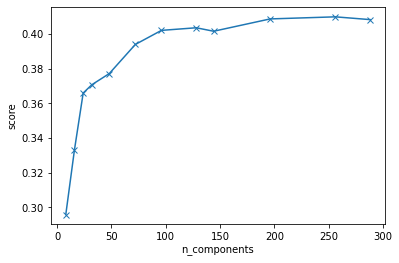

In [44]:
def logreg(factor,n_components):
    LR_train_x_PCA = (trainset.data[:,::factor,::factor,]/255).reshape(50000,-1)
    LR_test_x_PCA = (testset.data[:,::factor,::factor,]/255).reshape(10000,-1)
    # n_components = 3*32 #
    pca = PCA(n_components=n_components)
    LR_train_x_PCA = pca.fit_transform(LR_train_x_PCA)
    LR_test_x_PCA = pca.transform(LR_test_x_PCA)

    LogReg = LogisticRegression(solver='saga')
    LogReg.fit(LR_train_x_PCA,LR_train_y)
    logreg_score = LogReg.score(LR_test_x_PCA,LR_test_y)
    return logreg_score


scores =[]
n_list = [8,16,24,32,48,72,96,128,144,196,256,288] #logistic regression does not converge fast enough for values larger than 300
for n in n_list :
    scores.append(logreg(factor=1,n_components=n))

plt.figure("score for logreg")
plt.plot(n_list,scores,"-x")
plt.ylabel("score")
plt.xlabel("n_components")
plt.show()


The best score is around 250 components for the PCA algorithm. 

### PCA with grayscale or only 1 channel

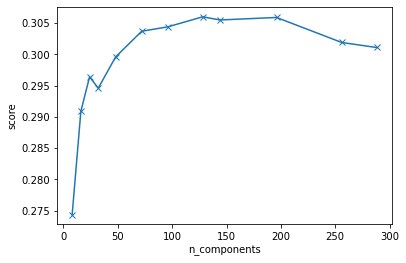

In [40]:
def logreg_grayscale(n_components):
    LR_train_x_grayscale = (trainset.data[:,:,:,:3] @ [0.3,0.6,0.1] / 255).reshape(50000,-1)
    LR_test_x_grayscale = (testset.data[:,:,:,:3] @ [0.3,0.6,0.1] / 255).reshape(10000,-1)
    pca = PCA(n_components=n_components)
    LR_train_x_PCA = pca.fit_transform(LR_train_x_grayscale)
    LR_test_x_PCA = pca.transform(LR_test_x_grayscale)

    LogReg = LogisticRegression(solver='saga')
    LogReg.fit(LR_train_x_PCA,LR_train_y)
    logreg_score = LogReg.score(LR_test_x_PCA,LR_test_y)
    return logreg_score

scores =[]
n_list = [8,16,24,32,48,72,96,128,144,196,256,288] #logistic regression does not converge fast enough for values larger than 300
for n in n_list :
    scores.append(logreg_grayscale(n_components=n))

plt.figure("score for logreg grayscaled")
plt.plot(n_list,scores,"-x")
plt.ylabel("score")
plt.xlabel("n_components")
plt.show()


Slightly worse results than straight PCA analysis, but expected since greyscaling an image destroys some information. 

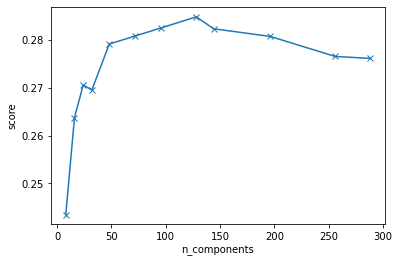

In [43]:
def logreg_single_channel(n_components,channel):
    LR_train_x_channel = (trainset.data[:,:,:,channel] / 255).reshape(50000,-1)
    LR_test_x_channel = (testset.data[:,:,:,channel] /255).reshape(10000,-1)
    pca = PCA(n_components=n_components)
    LR_train_x_PCA = pca.fit_transform(LR_train_x_channel)
    LR_test_x_PCA = pca.transform(LR_test_x_channel)

    LogReg = LogisticRegression(solver='saga')
    LogReg.fit(LR_train_x_PCA,LR_train_y)
    logreg_score = LogReg.score(LR_test_x_PCA,LR_test_y)
    return logreg_score

scores =[]
n_list = [8,16,24,32,48,72,96,128,144,196,256,288] #logistic regression does not converge fast enough for values larger than 300
for n in n_list :
    scores.append(logreg_single_channel(n_components=n,channel=0))

plt.figure(f"score for logreg with only 1 channel")
plt.plot(n_list,scores,"-x")
plt.ylabel("score")
plt.xlabel("n_components")
plt.show()


Worst results so far, but using only 1 color channel has the downside of having a lot less information anyway.

### Final logistic regression iteration

Grayscale and single channel loses a lot of information, so we'll ignore them. PCA gives the best result around n_components = 256. Downscaling obviously destroys information even before PCA, so we'll be using factor = 1. Using seaborn library lets display confusion matrix.


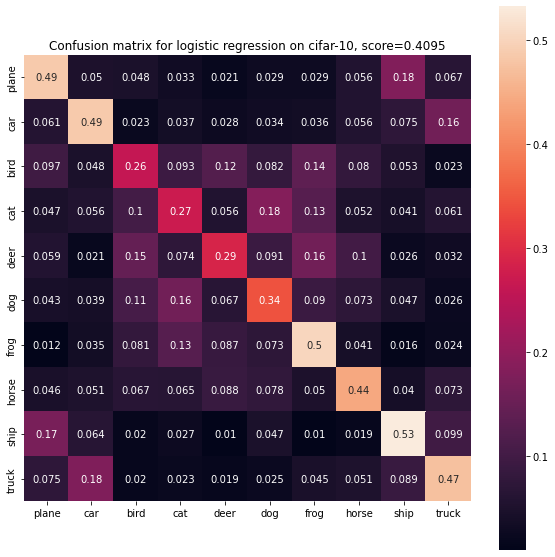

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#small modification to logreg()
def logreg(factor=1,n_components=256):
    LR_train_x_PCA = (trainset.data[:,::factor,::factor,]/255).reshape(50000,-1)
    LR_test_x_PCA = (testset.data[:,::factor,::factor,]/255).reshape(10000,-1)
    # n_components = 3*32 #
    pca = PCA(n_components=n_components)
    LR_train_x_PCA = pca.fit_transform(LR_train_x_PCA)
    LR_test_x_PCA = pca.transform(LR_test_x_PCA)

    LogReg = LogisticRegression(solver='saga')
    LogReg.fit(LR_train_x_PCA,LR_train_y)
    logreg_score = LogReg.score(LR_test_x_PCA,LR_test_y)
    predictions = LogReg.predict(LR_test_x_PCA)
    return logreg_score,predictions

score, y_pred = logreg(factor=1,n_components=256)
cf_matrix = confusion_matrix(LR_test_y,y_pred)
# sns.heatmap(cf_matrix/1000,annot=True,xticklabels=classes,yticklabels=classes)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cf_matrix/1000,annot=True,xticklabels=classes,yticklabels=classes,ax=ax,square=True)
ax.set_title(f"Confusion matrix for logistic regression on cifar-10, score={score}")
plt.show()

It seems like Logistic Regression has a problem differentiating animals from one another. Overall vehicles such as planes, trucks, cars and ships have the best scores, but they still have a noticable overlap. 

## Convolutional Neural Networks
first we create the classes for some architectures

### CNN, architecture 0


In [4]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.network = Sequential(
        nn.Conv2d(3, 48, 3,2,1),
        nn.ReLU(),
        nn.LocalResponseNorm(3),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(48, 96,3,2,1),
        nn.ReLU(),
        nn.LocalResponseNorm(1),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(96,128,3,2,1),
        nn.ReLU(),
        nn.Conv2d(128,128,3,2,1),
        nn.ReLU(),
        nn.Conv2d(128,96,3,2,1),
        nn.ReLU(),
        nn.LocalResponseNorm(1),#* mmaybe remove these rows
        nn.ReLU(),              #*
        nn.Flatten(),
        nn.Linear(96 , 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
        )
    def forward(self,x):
        return self.network(x)


### CNN1, architecture 1 

In [5]:
class CNN1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.network = Sequential(
            nn.Conv2d(3,64,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64,64,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2),
            nn.Dropout(p=0.25),

            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2,2),
            nn.Dropout(p=0.25),

            nn.Flatten(),
            nn.Linear(128*8*8,512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512,10)
        )
    def forward(self,x):
        return self.network(x)

### CNN2, architecture 2

In [6]:
class CNN2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
    def forward(self,x):
        return self.network(x)

### CNN3, architecture 3

In [7]:
class CNN3(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(), 
            nn.Linear(128*2*2, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(1),
        )
    def forward(self,x):
        return self.network(x)

### Define a function for easier training and validating

In [8]:
@torch.no_grad()
def validation_step(model: nn.Module, batch,device):
    model.eval()
    images,labels = batch[0].to(device), batch[1].to(device)
    outputs = model(images)
    loss = F.cross_entropy(outputs,labels)
    _, predicted = torch.max(outputs.data,1)
    acc = torch.tensor(torch.sum(predicted == labels).item() / len(predicted))
    return {'val_loss': loss.detach(), 'val_acc' : acc}


In [65]:
def fit(model : nn.Module,train_loader,test_loader,lr = 0.001,beta=(0.9,0.999),eps=1e-8,
epochs = 10,crit_class = nn.CrossEntropyLoss,opt_class =optim.Adam ):
    criterion = crit_class()
    optimizer = opt_class(model.parameters(),lr=lr,betas=beta,eps=eps)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    history =[]
    for epoch in range(epochs):
        model.train()
        train_losses =[]

        #training phase
        for i,data in enumerate(train_loader):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs,labels)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        #validation phase
        outputs = [validation_step(model,batch,device) for batch in test_loader]
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        train_loss = torch.stack(train_losses).mean()
        results = {'val_loss': epoch_loss.item(),'val_acc':epoch_acc.item(), 'train_loss': train_loss.item()}
        print(f"Model[lr={lr},beta={beta},eps={eps}]Epoch [{epoch}], train_loss: {results['train_loss']:.4f}, val_loss: {results['val_loss']:.4f}, val_acc: {results['val_acc']:.4f}")
        history.append(results)
    print("Finished model training")
    return history

def eval(model:nn.Module,test_loader,device = 'cpu'):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data[0].to(device), data[1].to(device)
            outputs = model(images).to(device)
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    print(f'Accuracy of the {str(type(model))[17:-2]} model on the 10000 test images: {100 * acc} %')
    return 


### Parameters 


Note: Other parameters that are not tested here are Batch size of the data loader and epochs of training. Due to time and resources Batch size will be tested separately, using the most optimal combination of these parameters. It could be that there is a different combination of batch size and optimizer params, but not enough resources to test this hypothesis. Epochs are left at the default value of 10.

In [133]:
learning_rate = [0.0001,0.001,0.003]
betas = [(0.9,0.999),(0.8,0.999),(0.9,0.95),(0.95,0.999)]
epsilons = [1e-8,3e-8]
print(len(betas)*len(epsilons)*len(learning_rate))
print(len(betas),len(epsilons),len(learning_rate),len(betas)*len(epsilons)*len(learning_rate))
print(epsilons)

24
4 2 3 24
[1e-08, 3e-08]


### Training models with different parameters to find the best combination  

Data for models ( parameters and accuracy over training) is saved in 2 folders for each architecture. After training the best model for each architecture is chosen for further testing.  
Actual training done beforehand using Google Colab, ignore the next cells.

In [ ]:
#Training models for CNN architecture
for lr in learning_rate:
    for beta in betas:
        for eps in epsilons:
            model = CNN()
            history = fit(model,trainloader,testloader,lr,beta,eps,epochs=10,crit_class=nn.CrossEntropyLoss,opt_class=optim.Adam)
            PATH = f'./CNN_models/lr={lr}_beta={beta}_eps={eps}.pth'
            torch.save(model.state_dict(),PATH)
            PATH = f'./CNN_histories/lr={lr}_beta={beta}_eps={eps}.pt'
            torch.save(history,PATH)

In [ ]:
#Training models for CNN1 architecture
for lr in learning_rate:
    for beta in betas:
        for eps in epsilons:
            model = CNN1()
            history = fit(model,trainloader,testloader,lr,beta,eps,epochs=10,crit_class=nn.CrossEntropyLoss,opt_class=optim.Adam)
            PATH = f'./CNN1_models/lr={lr}_beta={beta}_eps={eps}.pth'
            torch.save(model.state_dict(),PATH)
            PATH = f'./CNN1_histories/lr={lr}_beta={beta}_eps={eps}.pt'
            torch.save(history,PATH)

In [ ]:
#Training models for CNN2 architecture
for lr in learning_rate:
    for beta in betas:
        for eps in epsilons:
            model = CNN2()
            history = fit(model,trainloader,testloader,lr,beta,eps,epochs=10,crit_class=nn.CrossEntropyLoss,opt_class=optim.Adam)
            PATH = f'./CNN2_models/lr={lr}_beta={beta}_eps={eps}.pth'
            torch.save(model.state_dict(),PATH)
            PATH = f'./CNN2_histories/lr={lr}_beta={beta}_eps={eps}.pt'
            torch.save(history,PATH)

In [ ]:
#Training models for CNN3 architecture
for lr in learning_rate:
    for beta in betas:
        for eps in epsilons:
            model = CNN3()
            history = fit(model,trainloader,testloader,lr,beta,eps,epochs=10,crit_class=nn.CrossEntropyLoss,opt_class=optim.Adam)
            PATH = f'./CNN3_models/lr={lr}_beta={beta}_eps={eps}.pth'
            torch.save(model.state_dict(),PATH)
            PATH = f'./CNN3_histories/lr={lr}_beta={beta}_eps={eps}.pt'
            torch.save(history,PATH)

Let's see how much the parameters affect each architecture

In [199]:
def plot_metric(history,id,metric = 'val_acc'):
    metrics = [x[metric] for x in history]
    plt.figure("metric "+id)
    plt.plot(metrics, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title(f'{id}')

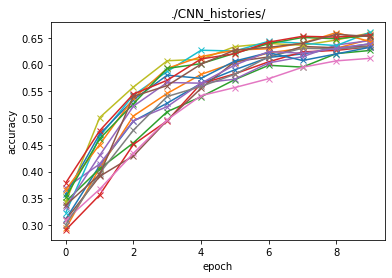

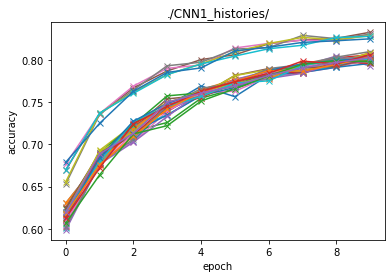

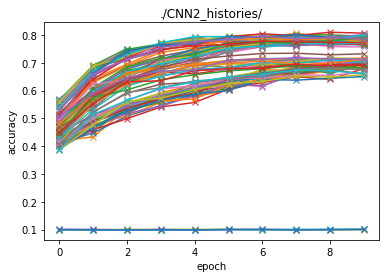

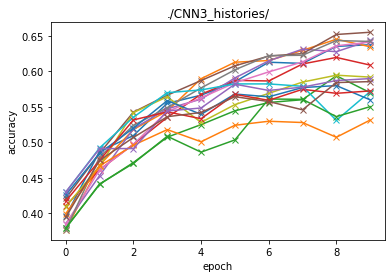

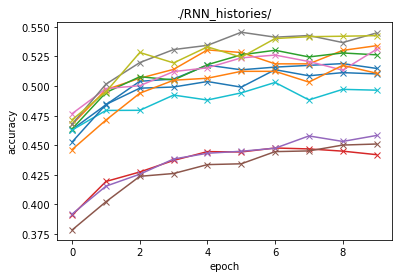

In [200]:
directories = [
        './CNN_histories/',
        './CNN1_histories/',
        './CNN2_histories/',
        './CNN3_histories/',
        './RNN_histories/',
    ]
for directory in directories:
    histories = {}
    for filename in os.listdir(directory):
        PATH = directory+filename
        histories[filename] = torch.load(PATH)
    for h in histories:
        plot_metric(histories[h],directory)

### Finding the best models for each architecture and saving them

Function to find and save the best model given an architecture

In [184]:
def save_best_model(arch:nn.Module):
    histories = {}
    arch_name = str(arch)[17:-2]
    directory = f'./{arch_name}_histories/'
    for filename in os.listdir(directory):
        PATH = directory+filename
        histories[filename] = torch.load(PATH)
    best_model_history = max(histories,key = lambda x : histories[x][9]['val_acc'])

    print(arch_name)
    print(best_model_history)
    print(histories[best_model_history][9])
    
    model = arch()
    model.load_state_dict(torch.load(f'./{arch_name}_models/'+best_model_history+'h'))

    PATH = './best_models/'+arch_name+'.pth'
    torch.save(model.state_dict(),PATH)
    PATH = './best_models/'+arch_name+'_history.pt'
    torch.save(histories[best_model_history],PATH)


In [186]:
save_best_model(CNN)
save_best_model(CNN1)
save_best_model(CNN2)
save_best_model(CNN3)


CNN
lr=0.003_beta=(0.8, 0.999)_eps=3e-08.pt
{'val_loss': 1.001481294631958, 'val_acc': 0.6605023741722107, 'train_loss': 0.7454793453216553}
CNN1
lr=0.0003_beta=(0.8, 0.999)_eps=1e-08.pt
{'val_loss': 0.5215855240821838, 'val_acc': 0.8331685066223145, 'train_loss': 0.23327086865901947}
CNN2
lr=0.001_beta=(0.9, 0.95)_eps=3.97e-08.pt
{'val_loss': 0.7746257781982422, 'val_acc': 0.8067642450332642, 'train_loss': 0.17170874774456024}
CNN3
lr=0.001_beta=(0.9, 0.999)_eps=3e-08.pt
{'val_loss': 1.806511640548706, 'val_acc': 0.6548655033111572, 'train_loss': 1.775578498840332}


Folders with all the architectures' iterations will not be included, due to sizes(around 2GB for each model). The best models are stored in the ``./best_models`` folder

#### Loading the best version for each model 

In [9]:
#loading the models

PATH = './best_models/CNN.pth'
best_model_cnn = CNN()
best_model_cnn.load_state_dict(torch.load(PATH))
PATH = './best_models/CNN_history.pt'
best_history_cnn = torch.load(PATH)
print("Finished loading CNN")

PATH = './best_models/CNN1.pth'
best_model_cnn1 = CNN1()
best_model_cnn1.load_state_dict(torch.load(PATH))
PATH = './best_models/CNN1_history.pt'
best_history_cnn1 = torch.load(PATH)
print("Finished loading CNN1")

PATH = './best_models/CNN2.pth'
best_model_cnn2 = CNN2()
best_model_cnn2.load_state_dict(torch.load(PATH))
PATH = './best_models/CNN2_history.pt'
best_history_cnn2 = torch.load(PATH)
print("Finished loading CNN2")

PATH = './best_models/CNN3.pth'
best_model_cnn3 = CNN3()
best_model_cnn3.load_state_dict(torch.load(PATH))
PATH = './best_models/CNN3_history.pt'
best_history_cnn3 = torch.load(PATH)
print("Finished loading CNN3")

Finished loading CNN
Finished loading CNN1
Finished loading CNN2
Finished loading CNN3


### Comparison of best models

Defining function for easier plotting

In [139]:
def plot_metric(history,metric = 'val_acc'):
    metrics = [x[metric] for x in history]
    plt.figure("metric "+metric)
    plt.plot(metrics, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title(f'{metric} vs. No. of epochs')

Accuracy vs. epochs

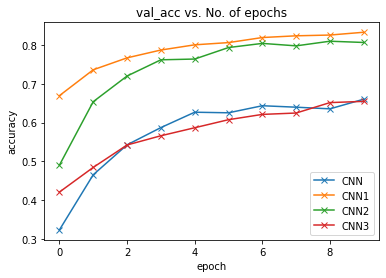

In [188]:
plot_metric(best_history_cnn)
plot_metric(best_history_cnn1)
plot_metric(best_history_cnn2)
plot_metric(best_history_cnn3)
plt.legend(["CNN","CNN1","CNN2","CNN3"])
plt.show()

Train loss vs. epochs

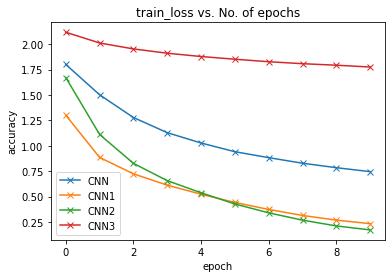

In [189]:
plot_metric(best_history_cnn,'train_loss')
plot_metric(best_history_cnn1,'train_loss')
plot_metric(best_history_cnn2,'train_loss')
plot_metric(best_history_cnn3,'train_loss')
plt.legend(["CNN","CNN1","CNN2","CNN3"])
plt.show()

Validation loss vs. epochs

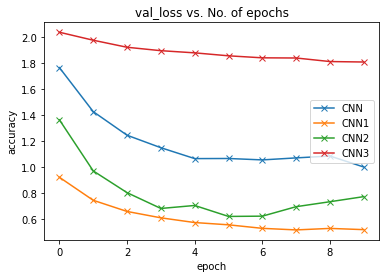

In [190]:
plot_metric(best_history_cnn,'val_loss')
plot_metric(best_history_cnn1,'val_loss')
plot_metric(best_history_cnn2,'val_loss')
plot_metric(best_history_cnn3,'val_loss')
plt.legend(["CNN","CNN1","CNN2","CNN3"])
plt.show()

Comparison between train loss and validation loss

In [191]:
def plot_loss(history):
    train_loss = [x['train_loss'] for x in history]
    val_loss = [x['val_loss'] for x in history]
    plt.figure("loss correlation")
    plt.plot(train_loss,val_loss, '-x')
    plt.xlabel('train loss')
    plt.ylabel('validation loss')
    plt.title('train loss vs validation loss')

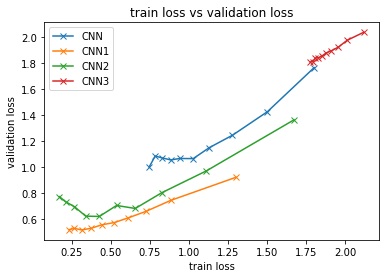

In [192]:
plot_loss(best_history_cnn)
plot_loss(best_history_cnn1)
plot_loss(best_history_cnn2)
plot_loss(best_history_cnn3)
plt.legend(["CNN","CNN1","CNN2","CNN3"])
plt.show()

It looks line CNN2 starts overfitting at the end, losing on some accuracy compared to CNN1. This is probably due to the extra convolutional layer inside its architecture, leading to more parameters and the model trying to predict more of the trainset. Another explanation is that the batch normalization and dropout layers in the CNN1 architecture contribute to the small boost over CNN2.

Test accuracy for each model

In [195]:
eval(best_model_cnn,testloader)
eval(best_model_cnn1,testloader)
eval(best_model_cnn2,testloader)
eval(best_model_cnn3,testloader)

Accuracy of the CNN model on the 10000 test images: 66.02 %
Accuracy of the CNN1 model on the 10000 test images: 79.22 %
Accuracy of the CNN2 model on the 10000 test images: 80.60000000000001 %
Accuracy of the CNN3 model on the 10000 test images: 65.45 %


Interesting that the CNN1 model does worse on the test set compared to CNN2, even though the first has better validation accuracy.

And confusion matrix:

In [196]:
def conf_matrix(model : nn.Module, test_loader):
    from sklearn.metrics import confusion_matrix
    from seaborn import heatmap
    
    #generate model predictions
    y_pred = []
    y_true = []
    with torch.no_grad():
        for inputs,labels in test_loader:
            prediction = model(inputs)
            prediction = (torch.max(prediction.data,1))[1]
            y_pred.extend(prediction)
            y_true.extend(labels)
    
    cf_matrix = confusion_matrix(y_true,y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap(cf_matrix/1000,annot=True,xticklabels=classes,yticklabels=classes,ax=ax,square=True)
    ax.set_title(f"Confusion matrix for {str(type(model))[17:-2]} architecture on cifar-10")
    plt.show()
    return cf_matrix

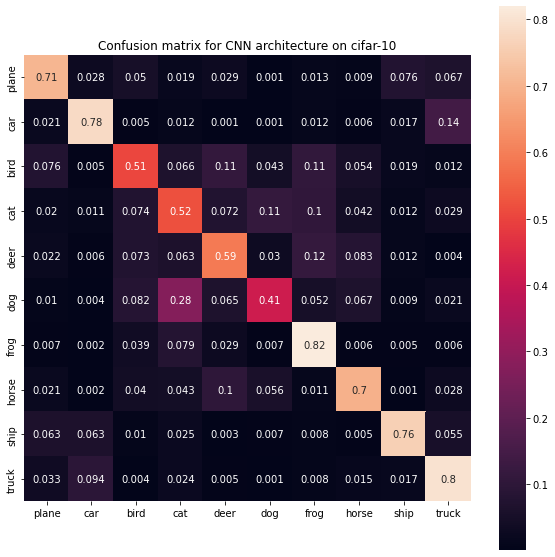

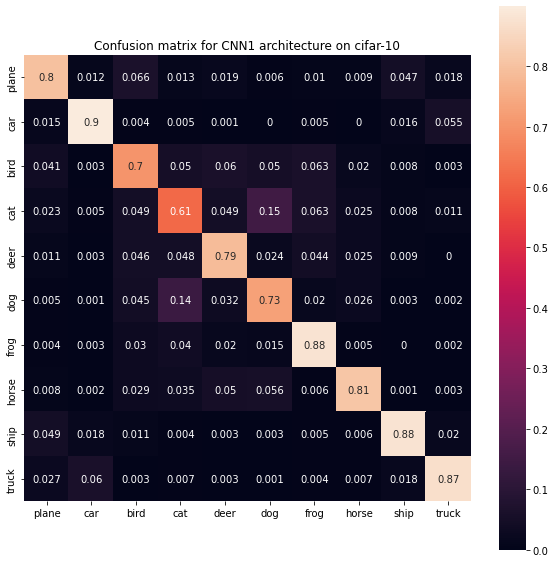

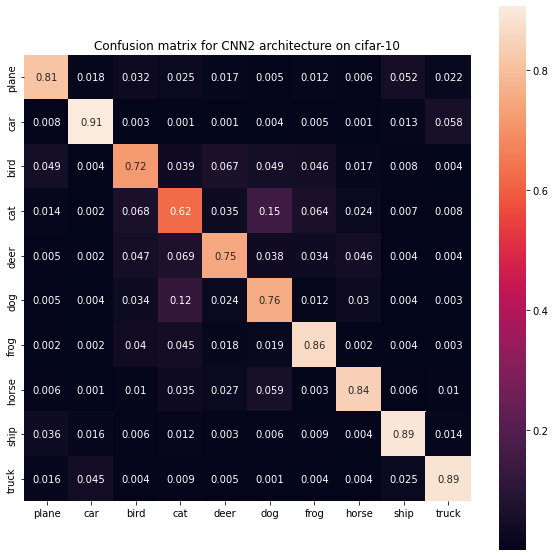

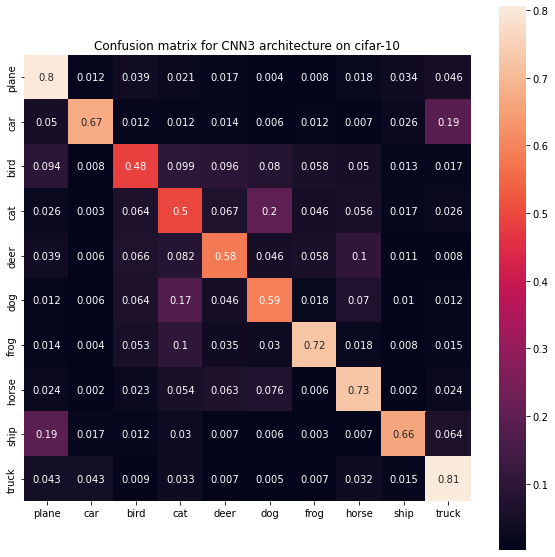

In [198]:
cfm_cnn = conf_matrix(best_model_cnn,testloader)
cfm_cnn1 = conf_matrix(best_model_cnn1,testloader)
cfm_cnn2 = conf_matrix(best_model_cnn2,testloader)
cfm_cnn3 = conf_matrix(best_model_cnn3,testloader)

Again, not so good result for animals, biggest overlap is for cats and dogs.

### Comparing example models for each architecture

Generating models using default values for parameters

In [10]:
model = CNN2()
history = fit(model,trainloader,testloader)

Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [0], train_loss: 1.6537, val_loss: 1.2705, val_acc: 0.5414
Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [1], train_loss: 1.0828, val_loss: 0.9808, val_acc: 0.6524
Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [2], train_loss: 0.8168, val_loss: 0.8030, val_acc: 0.7193
Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [3], train_loss: 0.6471, val_loss: 0.7511, val_acc: 0.7417
Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [4], train_loss: 0.5210, val_loss: 0.7088, val_acc: 0.7659
Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [5], train_loss: 0.4137, val_loss: 0.6795, val_acc: 0.7736
Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [6], train_loss: 0.3192, val_loss: 0.7015, val_acc: 0.7836
Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [7], train_loss: 0.2380, val_loss: 0.7558, val_acc: 0.7860
Model[lr=0.001,beta=(0.9, 0.999),eps=1e-08]Epoch [8], train_loss: 0.1946, val_loss: 0.8410, val_acc: 0.7810
Model[lr=0.001,beta=(0.9, 0.

In [12]:
#saving the model for easier use later on
PATH = './example_models/CNN2.pth'
torch.save(model.state_dict(),PATH)
PATH = './example_models/CNN2_history.pt'
torch.save(history,PATH)

In [49]:
#loading the models
PATH = './example_models/CNN.pth'
model_cnn = CNN()
model_cnn.load_state_dict(torch.load(PATH))
PATH = './example_models/CNN_history.pt'
history_cnn = torch.load(PATH)
print("Finished loading CNN")

PATH = './example_models/CNN1.pth'
model_cnn1 = CNN1()
model_cnn1.load_state_dict(torch.load(PATH))
PATH = './example_models/CNN1_history.pt'
history_cnn1 = torch.load(PATH)
print("Finished loading CNN1")

PATH = './example_models/CNN2.pth'
model_cnn2 = CNN2()
model_cnn2.load_state_dict(torch.load(PATH))
PATH = './example_models/CNN2_history.pt'
history_cnn2 = torch.load(PATH)
print("Finished loading CNN2")

PATH = './example_models/CNN3.pth'
model_cnn3 = CNN3()
model_cnn3.load_state_dict(torch.load(PATH))
PATH = './example_models/CNN3_history.pt'
history_cnn3 = torch.load(PATH)
print("Finished loading CNN3")

Finished loading CNN
Finished loading CNN1
Finished loading CNN2
Finished loading CNN3


#### Let's plot their accuracies, validation loss and train loss and compare the 4 architectures

Accuracy vs. epochs

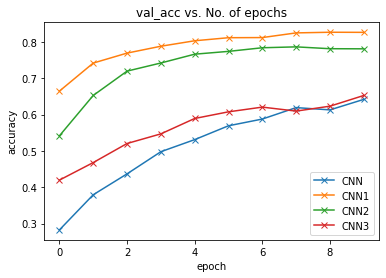

In [35]:
plot_metric(history_cnn)
plot_metric(history_cnn1)
plot_metric(history_cnn2)
plot_metric(history_cnn3)
plt.legend(["CNN","CNN1","CNN2","CNN3"])
plt.show()

Train loss vs. epochs

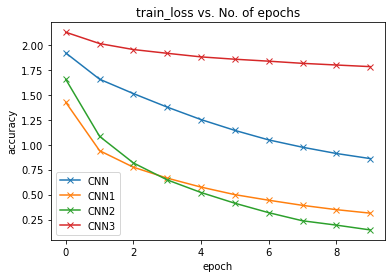

In [36]:
plot_metric(history_cnn,'train_loss')
plot_metric(history_cnn1,'train_loss')
plot_metric(history_cnn2,'train_loss')
plot_metric(history_cnn3,'train_loss')
plt.legend(["CNN","CNN1","CNN2","CNN3"])
plt.show()

Validation loss vs. epochs

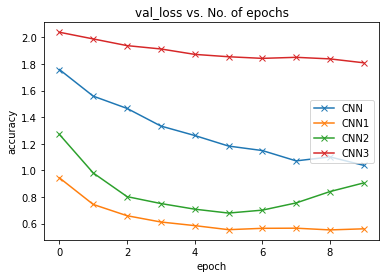

In [37]:
plot_metric(history_cnn,'val_loss')
plot_metric(history_cnn1,'val_loss')
plot_metric(history_cnn2,'val_loss')
plot_metric(history_cnn3,'val_loss')
plt.legend(["CNN","CNN1","CNN2","CNN3"])
plt.show()

Comparison between train loss and validation loss

In [38]:
def plot_loss(history):
    train_loss = [x['train_loss'] for x in history]
    val_loss = [x['val_loss'] for x in history]
    plt.figure("loss correlation")
    plt.plot(train_loss,val_loss, '-x')
    plt.xlabel('train loss')
    plt.ylabel('validation loss')
    plt.title('train loss vs validation loss')

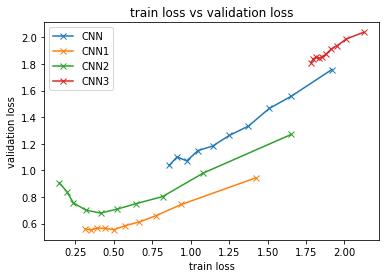

In [39]:
plot_loss(history_cnn)
plot_loss(history_cnn1)
plot_loss(history_cnn2)
plot_loss(history_cnn3)
plt.legend(["CNN","CNN1","CNN2","CNN3"])
plt.show()

Finally test accuracy for each architecture

In [129]:
eval(model_cnn,testloader)
eval(model_cnn1,testloader)
eval(model_cnn2,testloader)
eval(model_cnn3,testloader)

Accuracy of the CNN model on the 10000 test images: 64.03999999999999 %
Accuracy of the CNN1 model on the 10000 test images: 78.62 %
Accuracy of the CNN2 model on the 10000 test images: 78.59 %
Accuracy of the CNN3 model on the 10000 test images: 65.13 %


#### Confusion matrix for each architecture

In [52]:
def conf_matrix(model : nn.Module, test_loader):
    from sklearn.metrics import confusion_matrix
    from seaborn import heatmap
    
    #generate model predictions
    y_pred = []
    y_true = []
    with torch.no_grad():
        for inputs,labels in test_loader:
            prediction = model(inputs)
            prediction = (torch.max(prediction.data,1))[1]
            y_pred.extend(prediction)
            y_true.extend(labels)
    
    cf_matrix = confusion_matrix(y_true,y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap(cf_matrix/1000,annot=True,xticklabels=classes,yticklabels=classes,ax=ax,square=True)
    ax.set_title(f"Confusion matrix for {str(type(model))[17:-2]} architecture on cifar-10")
    plt.show()
    return cf_matrix


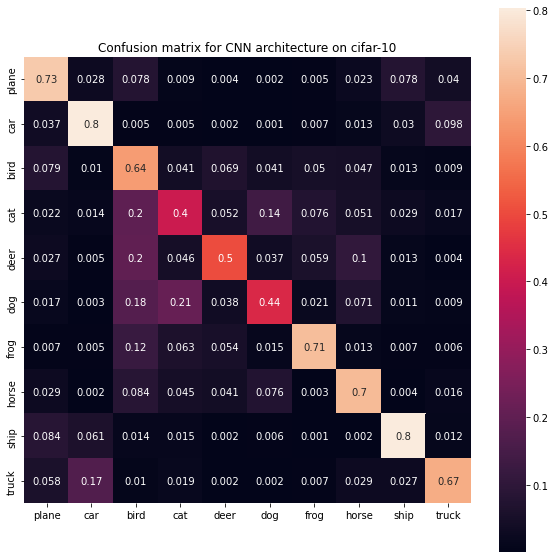

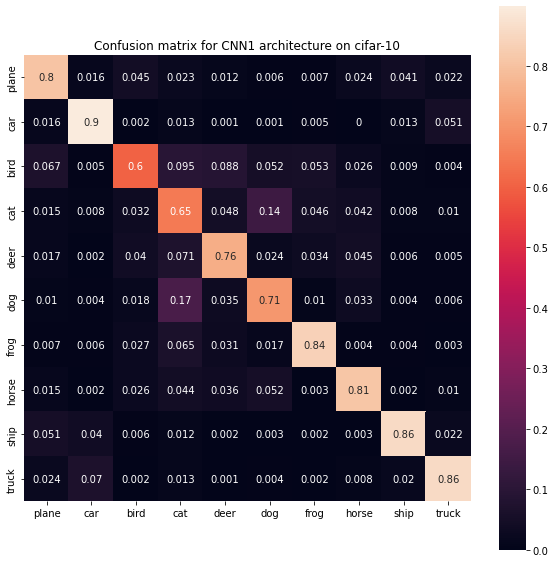

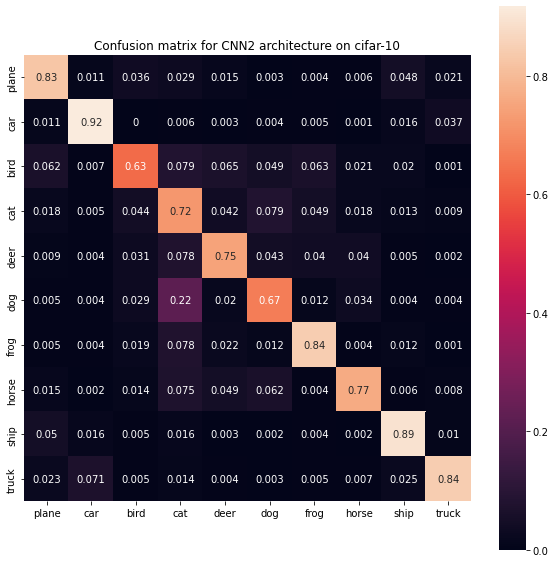

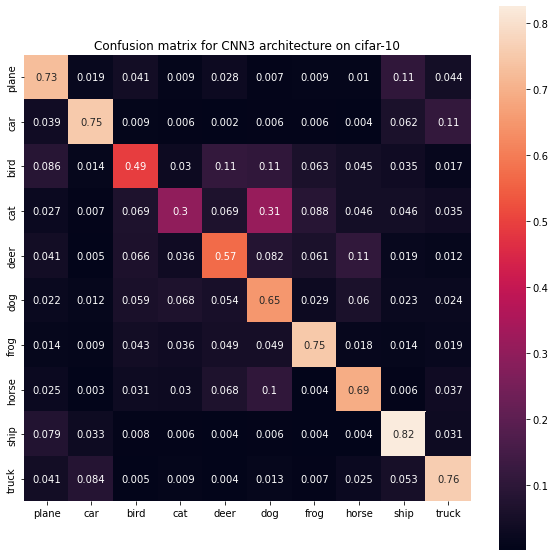

In [53]:
cfm_cnn = conf_matrix(model_cnn,testloader)
cfm_cnn1 = conf_matrix(model_cnn1,testloader)
cfm_cnn2 = conf_matrix(model_cnn2,testloader)
cfm_cnn3 = conf_matrix(model_cnn3,testloader)

Once again we see some overlap between different animals. It could be that the images do not have enough details to differentiate good enough patterns for animals. The biggest overlap is between cats and dogs which should be expected due to relative sizes and shapes. 

## Recurrent Neural Network

Creating a sample Recurrent neural network just to test its relative performance.

In [69]:
class RNN(nn.Module):
    def __init__(self,hidden_dim,layer_dim,dropout = 0) -> None:
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.RNN(32*32*3,hidden_dim,layer_dim,nonlinearity='relu',dropout=dropout,batch_first = True)
        self.fc = nn.Linear(hidden_dim,10)
    
    def forward(self,x):
        x = x.reshape(x.size(0),-1)
        batch_size = x.size(0)
        x = x.unsqueeze(1)
        
        
        hidden = self.init_hidden(batch_size).to(device)
        

        out, hidden = self.rnn(x, hidden)
        
        
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        hidden = torch.zeros(self.layer_dim, batch_size, self.hidden_dim)
        return hidden

#### Training function modification for RNN

training and validation methods are slightly modified to work with the RNN's architecture

In [100]:
@torch.no_grad()
def validation_step_rnn(model: nn.Module, batch,device):
    model.eval()
    images,labels = batch[0].to(device), batch[1].to(device)
    outputs,_ = model(images)
    loss = F.cross_entropy(outputs,labels)
    _, predicted = torch.max(outputs.data,1)
    acc = torch.tensor(torch.sum(predicted == labels).item() / len(predicted))
    return {'val_loss': loss.detach(), 'val_acc' : acc}

def fit_rnn(model : nn.Module,train_loader,test_loader,lr=0.001,beta=(0.9, 0.999),eps=1e-8,epochs = 10,crit_class = nn.CrossEntropyLoss,opt_class =optim.Adam ):
    criterion = crit_class()
    optimizer = opt_class(model.parameters(),lr=lr,betas=beta,eps=eps)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    history =[]
    for epoch in range(epochs):
        model.train()
        train_losses =[]

        #training phase
        for i,data in enumerate(train_loader):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs,_ = model(inputs)
            loss = criterion(outputs,labels)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        #validation phase
        outputs = [validation_step_rnn(model,batch,device) for batch in test_loader]
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        train_loss = torch.stack(train_losses).mean()
        results = {'val_loss': epoch_loss.item(),'val_acc':epoch_acc.item(), 'train_loss': train_loss.item()}
        print(f"Model[lr={lr},beta={beta},eps={eps}]Epoch [{epoch}], train_loss: {results['train_loss']:.4f}, val_loss: {results['val_loss']:.4f}, val_acc: {results['val_acc']:.4f}")
        history.append(results)
    print("Finished model training")
    return history


#### Training RNN models with different hidden layer dimensions and sizes

Actual training is done beforehand and the best model will be saved in the ``./best_models`` folder.

In [130]:
#Testing different combinations for hidden layers' size and dimension
rnn_params = [
    (16,1),
    (16,2),
    (16,4),
    (64,1),
    (64,2),
    (64,4),
    (128,1),
    (128,2),
    (128,4),
    (256,1),
    (256,2),
    (256,4),
]

In [ ]:
for hid_dim,layer_dim in rnn_params:
    model_rnn = RNN(hid_dim,layer_dim)
    history_rnn = fit_rnn(model_rnn,trainloader,testloader)
    PATH = f'./RNN_models/hid-dim={hid_dim}_layer-dim={layer_dim}.pth'
    torch.save(model_rnn.state_dict(),PATH)
    PATH = f'./RNN_histories/hid-dim={hid_dim}_layer-dim={layer_dim}.pth'
    torch.save(history_rnn,PATH)

Saving the best RNN model

In [93]:
histories = {}
arch_name = 'RNN'
directory = f'./{arch_name}_histories/'
for filename in os.listdir(directory):
    PATH = directory+filename
    histories[filename] = torch.load(PATH)
best_model_history = max(histories,key = lambda x : histories[x][9]['val_acc'])
print(best_model_history)
model = RNN(256,2)
model.load_state_dict(torch.load(f'./{arch_name}_models/'+best_model_history+'h'))

PATH = './best_models/'+arch_name+'.pth'
torch.save(model.state_dict(),PATH)
PATH = './best_models/'+arch_name+'_history.pt'
torch.save(histories[best_model_history],PATH)

hid-dim=256_layer-dim=2.pt


#### Accuracy and confusion matrix for the best RNN


Firstly, we have to load the model.

In [108]:
best_rnn = RNN(256,2) # we know that it has 2 hidden layers with 256 neurons in each layer from the name of the file
best_rnn.load_state_dict(torch.load('./best_models/RNN.pth'))
best_rnn.to(device)
best_rnn_history = torch.load('./best_models/RNN_history.pt')


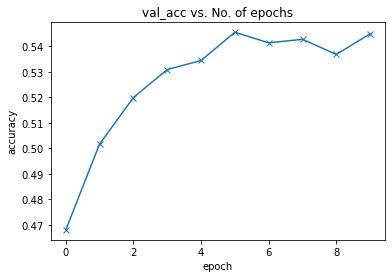

In [109]:
plot_metric(best_rnn_history)

Performance is worse than convolutional networks, but it could be due to the architecture's simplicity. Still, it performs better than logistic regression.

In [110]:
def conf_matrix_rnn(model : nn.Module, test_loader):
    from sklearn.metrics import confusion_matrix
    from seaborn import heatmap
    
    #generate model predictions
    y_pred = []
    y_true = []
    with torch.no_grad():
        for inputs,labels in test_loader:
            inputs = inputs.to(device)
            predictions,_ = model(inputs)
            _, predictions = torch.max(predictions.data,1)
            y_pred.extend(predictions.data.tolist())
            y_true.extend(labels.tolist())

            
    cf_matrix = confusion_matrix(y_true,y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap(cf_matrix/1000,annot=True,xticklabels=classes,yticklabels=classes,ax=ax,square=True)
    ax.set_title(f"Confusion matrix for {str(type(model))[17:-2]} architecture on cifar-10")
    plt.show()
    return cf_matrix

Modified version to generate confusion matrix for RNN.

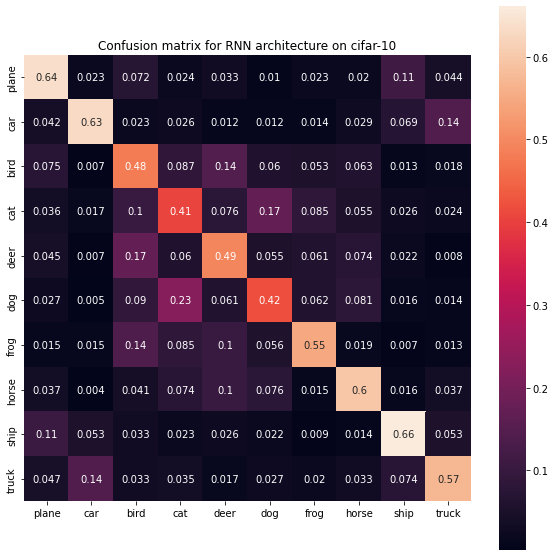

In [131]:
cfm_rnn = conf_matrix_rnn(best_rnn,testloader)

Same problems as the other models. Difficulty with animals, mainly differentiating cats and dogs. 

## Testing different Batch_sizes

We'll use CNN1, having the best results so far, to test different batch sizes and its effect on results. Parameters for the best results were lr=0.0003, beta=(0.8, 0.999), eps=1e-08.

In [146]:
def test_batch_size(b_sizes):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
    models ={}
    for batch_size in b_sizes:
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                                  shuffle=True, num_workers=0)
        testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                                 shuffle=False, num_workers=0)
        temp_model = CNN1()
        temp_history = fit(temp_model,trainloader,testloader,0.0003,(0.8,0.999),1e-8)
        models[batch_size] = temp_history
    for batch_size in b_sizes:
        plot_metric(models[batch_size])

    return models


Files already downloaded and verified
Files already downloaded and verified
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [0], train_loss: 1.4252, val_loss: 0.9423, val_acc: 0.6804
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [1], train_loss: 1.0573, val_loss: 0.7922, val_acc: 0.7329
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [2], train_loss: 0.9052, val_loss: 0.7157, val_acc: 0.7567
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [3], train_loss: 0.7952, val_loss: 0.7109, val_acc: 0.7617
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [4], train_loss: 0.7119, val_loss: 0.6310, val_acc: 0.7870
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [5], train_loss: 0.6249, val_loss: 0.6092, val_acc: 0.7983
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [6], train_loss: 0.5624, val_loss: 0.5684, val_acc: 0.8113
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [7], train_loss: 0.4981, val_loss: 0.5680, val_acc: 0.8155
Model[lr=0.0003,beta=(0.8, 0.999),eps=1e-08]Epoch [8

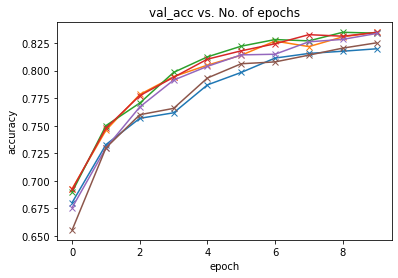

In [147]:
batch_sizes = [4,16,32,64,128,256]
model_histories = test_batch_size(batch_sizes)

It seems that batch size doesn't affect accuracy that much. The difference between the different models is in the ballpark of 0.02 which should be insignificant after accounting for error due to randomness.

## Let's compare all our models

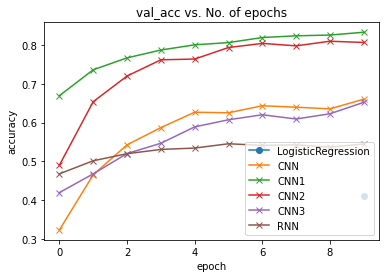

In [171]:
plt.figure("metric val_acc")
plt.plot(9,score,'-o')
plot_metric(best_history_cnn)
plot_metric(best_history_cnn1)
plot_metric(best_history_cnn2)
plot_metric(history_cnn3)##TODO change to best model
plot_metric(best_rnn_history)
plt.legend(['LogisticRegression','CNN','CNN1','CNN2','CNN3','RNN'])
plt.show()

## Try the best model with other images

Let's try some images with our CNN1 model

In [11]:
# Function to get a prediction from a model
def predict_image(img,model):
    transformer = transforms.ToTensor()
    img = transformer(img)
    img = img.unsqueeze(0)
    prediction = torch.max(model(img).data,1)[1].tolist()[0]
    return classes[prediction]

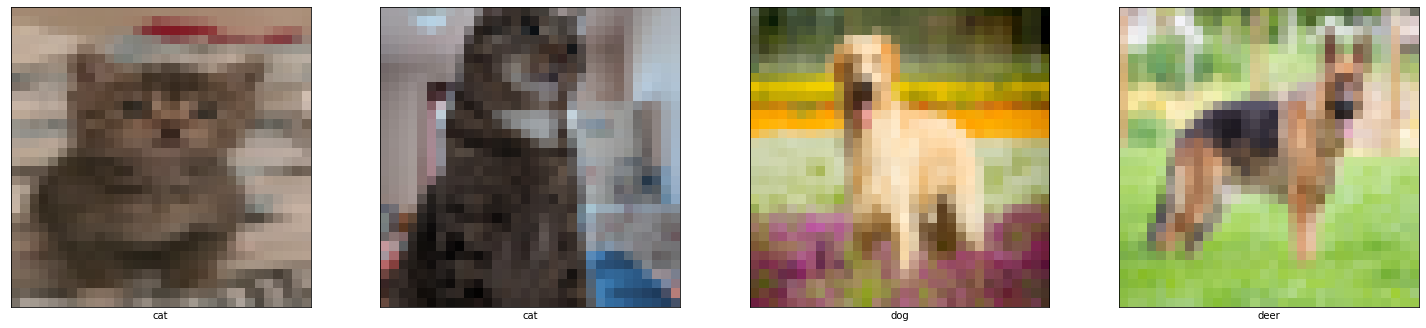

In [12]:
plt.figure(figsize=(32,32))

jazz_image = PIL.Image.open('./test_images/49947829_229399747841748_2295760504766857216_n.png')
jazz_image = jazz_image.resize((32,32))
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(jazz_image)
plt.xlabel(predict_image(jazz_image,best_model_cnn1))

jazz_image2 = PIL.Image.open('./test_images/big jazzu.jpg')
jazz_image2 = jazz_image2.resize((32,32))
plt.subplot(5,5,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(jazz_image2)
plt.xlabel(predict_image(jazz_image2,best_model_cnn1))

dog1 = PIL.Image.open('./test_images/golden-retriever-dog-21668976.jpg')
dog1 = dog1.resize((32,32))
plt.subplot(5,5,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(dog1)
plt.xlabel(predict_image(dog1,best_model_cnn1))

dog2 = PIL.Image.open('./test_images/German-Shepherd-dog-Alsatian.webp')
dog2 = dog2.resize((32,32))
plt.subplot(5,5,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(dog2)
plt.xlabel(predict_image(dog2,best_model_cnn1))


plt.show()

Guess all of them but the german shepard dog correctly. Due to the picture's low quality it does resemble a deer. Let's try a pretrained AlexNet CNN.   
Since it is trained on the ImageNet dataset, it would need different labels and requires higher resolution image, so we'll skip the resize part.

In [207]:
alexnet = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
alexnet.eval()

Using cache found in C:\Users\Kliment/.cache\torch\hub\pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [209]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
def predict_image(img: PIL.Image,model):
    preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img = preprocess(img)
    img = img.unsqueeze(0)
    if torch.cuda.is_available():
        img = img.to('cuda')
        model.to('cuda')
    with torch.no_grad():
        output = model(img)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
    top_prob, top_cat = torch.topk(probabilities, 1)
    return top_prob,top_cat


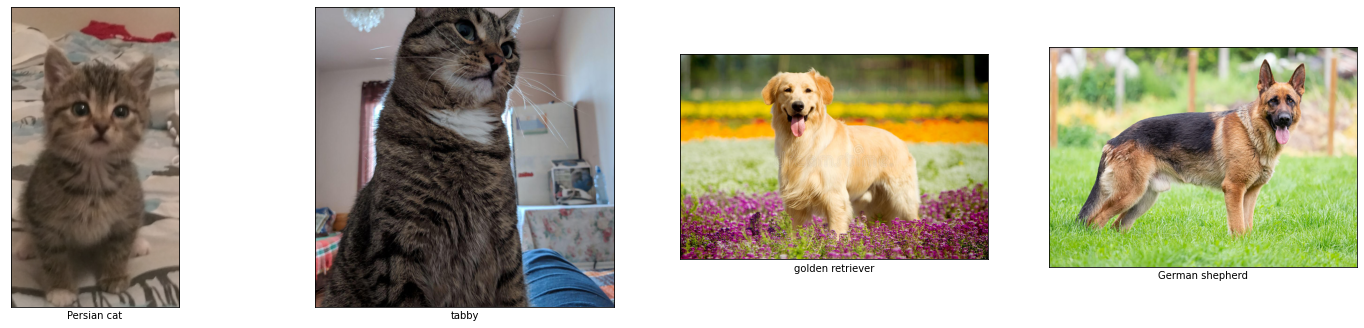

In [211]:
plt.figure(figsize=(32,32))
jazz_image = PIL.Image.open('./test_images/49947829_229399747841748_2295760504766857216_n.png')
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(jazz_image)
prob,category = predict_image(jazz_image,alexnet)
plt.xlabel(categories[category])

jazz_image2 = PIL.Image.open('./test_images/big jazzu.jpg')
plt.subplot(5,5,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(jazz_image2)
prob,category = predict_image(jazz_image2,alexnet)
plt.xlabel(categories[category])

dog_image = PIL.Image.open('./test_images/golden-retriever-dog-21668976.jpg')
plt.subplot(5,5,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(dog_image)
prob,category = predict_image(dog_image,alexnet)
plt.xlabel(categories[category])

dog_image2 = PIL.Image.open('./test_images/German-Shepherd-dog-Alsatian.webp')
plt.subplot(5,5,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(dog_image2)
prob,category = predict_image(dog_image2,alexnet)
plt.xlabel(categories[category])

plt.show()

As we can see it even tries to guess the breed of animal. Granted it's not perfect - the first and second cat are the same, just different age.

## Conclusion

We compared Logistic Regression and Neural Networks on classifying images from the CIFAR-10 images dataset. The results were as expected - the neural networks performed better, reaching an accuracy of ~80% with the best architecture tested, due to their larger amounts of parameters and use of Convolutional layers. Comparing the CNN1 and CNN2 neural networks we see that the extra convolutional layer does not necesseraly increase performance, which could be because the model starts overfitting on the training images. Another difference is the inclusion of batch normalization layers in the CNN1 which slightly increased speed of training and could have helped for the architecture's performance. All of the models tested have a relative problem with differentiating animals, mainly cats and dogs.     
Exploring possible combinations for hyperparameters such as learning rate, betas, and epsilon for the Adam optimizer used in this project gave different results for each architecture, but it could be due to randomness and would require further testing with more computational power to handle the huge amount of training and validation. Furthermore testing the effect of batch size resulted in no significat difference in performance, but a huge performace for batch size of 128 compared to lower amounts.

## Sources


#### [1]. Sergio Alves, Deep Learning in PyTorch with CIFAR-10 dataset, [link](https://medium.com/@sergioalves94/deep-learning-in-pytorch-with-cifar-10-dataset-858b504a6b54)
##### [2]. Shashank Ramesh, A guide to an efficient way to build neural network architectures- Part II, [link](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7)
##### [3]. Alex Krizhevsky, ImageNet Classification with Deep Convolutional Neural Networks, [link](http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf)
##### [4]. Kaggle, Recurrent Neural Network with Pytorch, [link](https://www.kaggle.com/code/kanncaa1/recurrent-neural-network-with-pytorch)

##### [5]. Gabriel Loye, A Beginner’s Guide on Recurrent Neural Networks with PyTorch, [link](https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/)